<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1- فراخوان توابع و کتابخانه های مورد نیاز
</b>
</div>

In [2]:
import os
import pandas as pd
from persiantools.jdatetime import JalaliDate
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
#working_dir = os.getcwd()
working_dir ='..'  # Use on Jupyter Notebook

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
2- پارامترهای مهم
</b>
</div>

(3317, 21)
Data Shape = (3317, 20) & Y Shape = (3317,) & Y Conditions = [0. 1. 2. 3.]


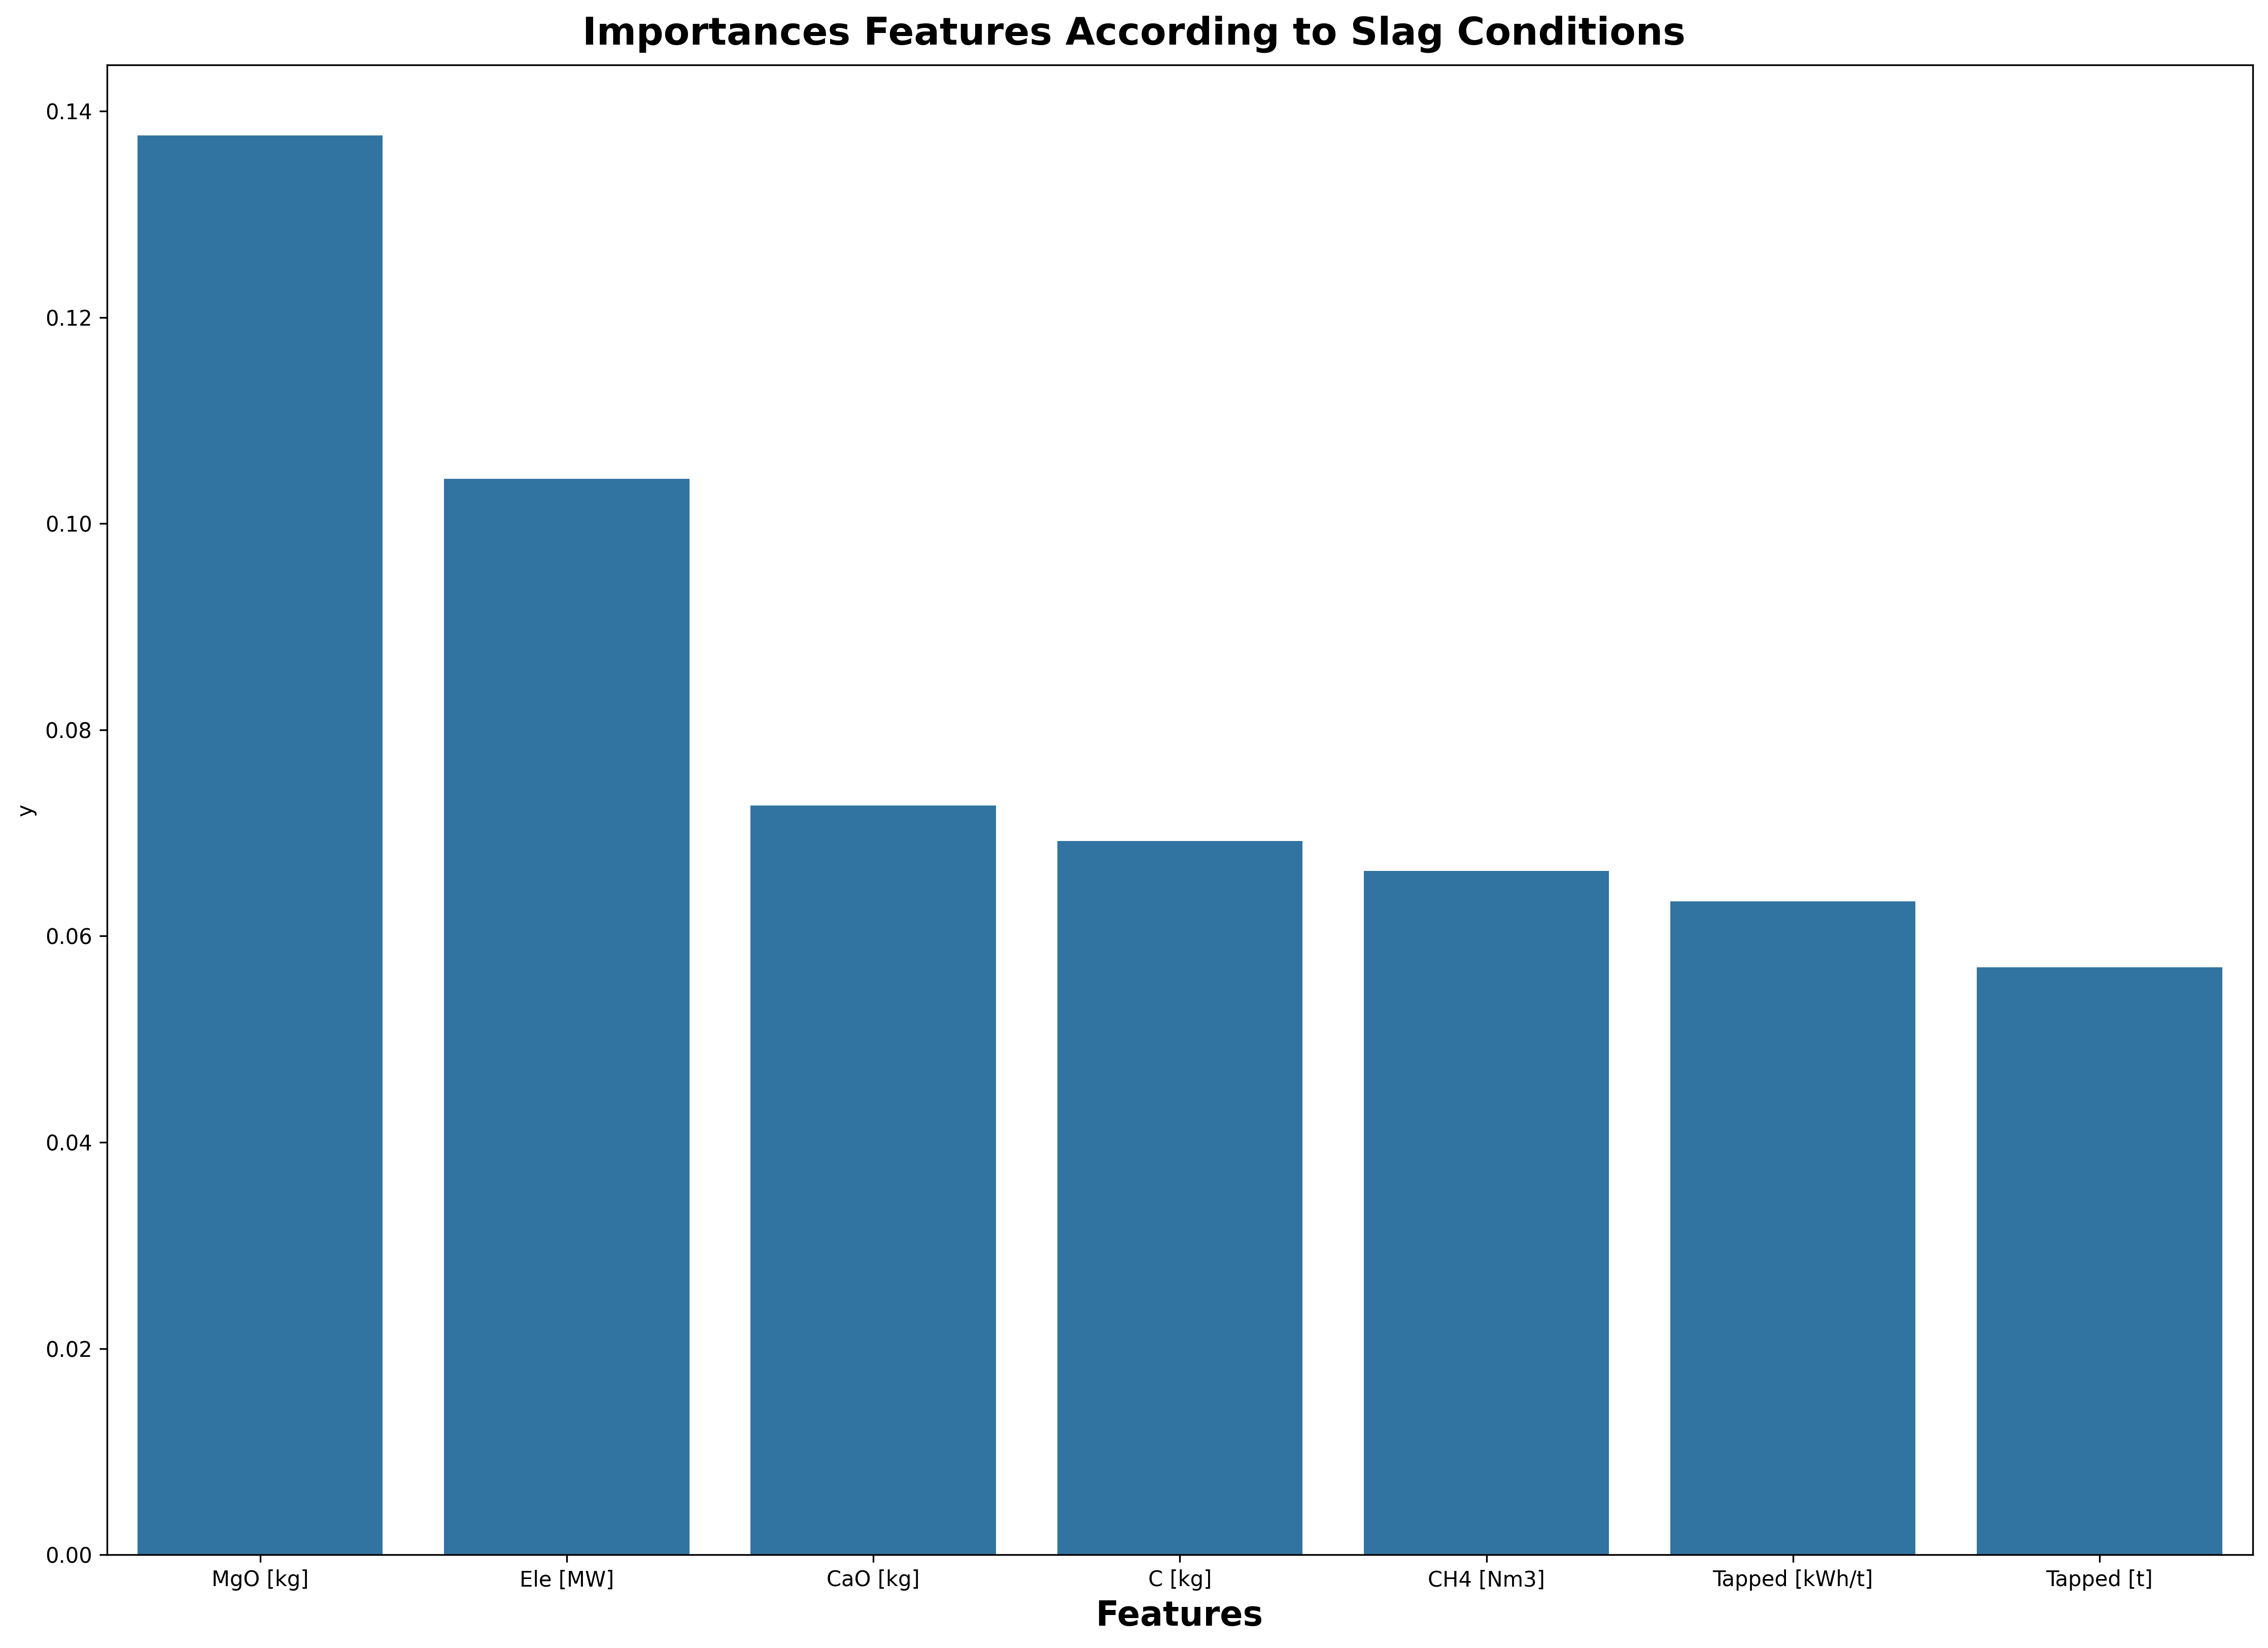

In [7]:
df = pd.read_csv(f"{working_dir}/data/label_encoded_eaf.csv")
df.drop(labels=['Delays','EAF_DRI','Chemical [MWh]'] ,axis=1,inplace=True)
df.set_index(keys='Heat', inplace=True ,drop=True)
print(df.shape)
X_features = df.columns.drop(['Slag_Label']).to_list()
x = df[X_features].values
y = df['Slag_Label'].values
print(f'Data Shape = {x.shape} & Y Shape = {y.shape} & Y Conditions = {np.unique(y)}')
#----------------Scaling Data-----------------------
scaler = MinMaxScaler()
X = scaler.fit_transform(x)
forest = RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X, y)
importances = forest.feature_importances_
imp_df = pd.DataFrame({'y':importances},index=X_features).sort_values(by='y',ascending=False).head(7)
#--------------------PLOT--------------
fig = plt.figure(figsize=(15,11),dpi=300)
fig.suptitle('Importances Features According to Slag Conditions', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Features', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.barplot(
    data=imp_df,
    x=imp_df.index,
    y='y',
    ax=ax1,
    )
fig.tight_layout()
#plt.savefig(f'{working_dir}/fig/C5000 Amp VS O2 purity.jpg')
plt.show()